<a href="https://colab.research.google.com/github/Nova3012k/Regression-Methods-Machine-Learning-/blob/main/Classification_with_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification with kNN**

## **Fundamentos de la tecnica**

El algoritmo k-Nearest Neighbors (kNN) es un método de clasificación supervisada basado en el principio de proximidad entre datos.

La idea es simple: las muestras similares tienden a pertenecer a la misma clase

Cuando llega un nuevo dato sin etiqueta, el algoritmo:

+ Calcula la distancia entre este punto y todos los puntos de entrenamiento

+ Selecciona los k puntos más cercanos (los vecinos)

+ Asigna al nuevo punto la clase más común entre esos vecinos

Características principales:

+ No requiere una fase de entrenamiento explícita.

+ Es un algoritmo perezoso (lazy learning).

+ La elección del parámetro k afecta el rendimiento:

+ k pequeño → modelo sensible al ruido.

+ k grande → modelo más general pero menos preciso.

Medidas de distancia más comunes:

Distancia Euclidiana:
d(xᵢ, xⱼ) = √Σ(xᵢₚ - xⱼₚ)²

Distancia Manhattan:
d(xᵢ, xⱼ) = Σ|xᵢₚ - xⱼₚ|

## **DataSet utilizando Iris**

Para demostrar kNN, se usa el Iris Dataset (Ronald A. Fisher, 1936).

Descripción:

+ 150 muestras.

+ 3 clases: Iris setosa, Iris versicolor, Iris virginica.

**4 características:**

1.   Longitud del sepalo
2.   Ancho del sepalo
3.   Longitud del petalo
4.   Ancho del petalo

**Objetivo:** clasificar la especie de flor a partir de sus medidas


In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

print(iris.target_names)


['setosa' 'versicolor' 'virginica']


# **Modelo matematico de la tecnica**

El modelo matemático del kNN se basa en distancias en un espacio n-dimensional.
Cada muestra de datos se representa como un vector:

x = [x₁, x₂, x₃, ..., xₙ]

Para clasificar un nuevo patrón x', se calcula su distancia con todas las muestras del conjunto de entrenamiento:

d(x', xᵢ) = √Σ(x'ₚ - xᵢₚ)²

Luego:

1. Se ordenan las distancias en orden ascendente

2. Se eligen los k vecinos más cercanos

3. Se obtiene la clase más frecuente entre ellos (por mayoría de votos)

Formalmente:

C(x') = argmax₍c₎ Σ I(yᵢ = c) para los k vecinos más cercanos
donde I es una función indicadora que vale 1 si la clase coincide y 0 en caso contrario

# **Librerias, clases, funciones y parametros**

**Librerías principales:**

+ Scikit-learn (sklearn): contiene el modelo KNeighborsClassifier

+ Pandas: manipulación de datos

+ Matplotlib y Seaborn: visualización de datos

+ NumPy: operaciones numéricas

**Clases y funciones más usadas:**

+ sklearn.datasets.load_iris() - carga el dataset Iris

+ sklearn.model_selection.train_test_split() - divide datos en entrenamiento y prueba

+ sklearn.preprocessing.StandardScaler() - normaliza los datos

+ sklearn.neighbors.KNeighborsClassifier(n_neighbors=k) - crea el modelo kNN

+ fit(X_train, y_train) - entrena el modelo

+ predict(X_test) - predice etiquetas

+ sklearn.metrics.confusion_matrix() - matriz de confusión

+ sklearn.metrics.accuracy_score() - exactitud

+ sklearn.metrics.classification_report() - métricas detalladas (precision, recall, f1-score)

# **Pipeline del modelo**

## **Procesamiento**
En esta etapa se cargan los datos, se analizan estadísticamente y se visualizan

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


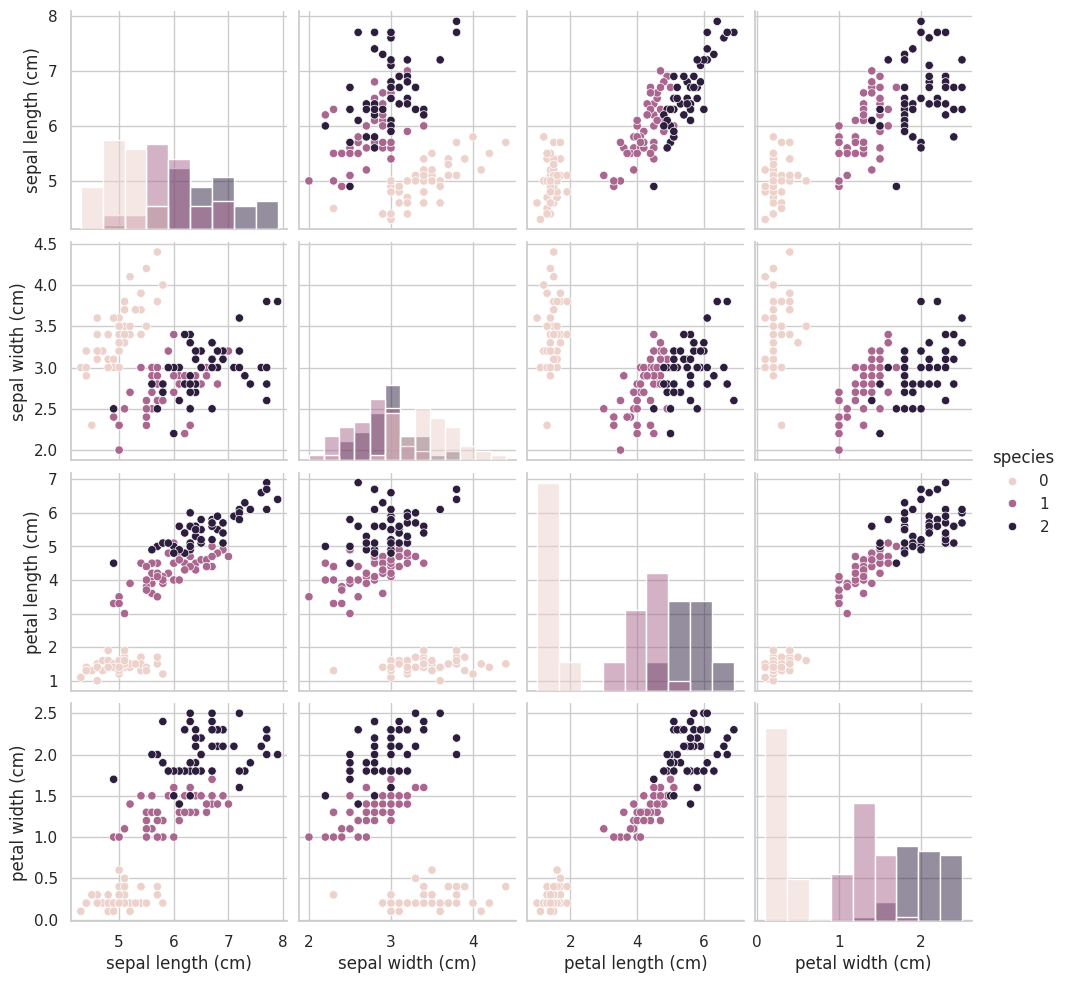

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Análisis estadístico
print(df.describe())

# Gráfico de dispersión
sns.pairplot(df, hue='species', diag_kind='hist')
plt.show()


## **Feature Engineering**
Aquí seleccionamos las variables relevantes y normalizamos los datos para evitar que alguna domine el cálculo de distancia

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = iris.data
y = iris.target

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **Entrenamiento y Predicción**
Se crea el modelo kNN con un valor de k (por ejemplo, k=5) y se entrena

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento
knn.fit(X_train, y_train)

# Predicción
y_pred = knn.predict(X_test)

print("Predicciones:", y_pred)


Predicciones: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


**Función personalizada de predicción**

In [7]:
def predecir_clase(patron):
    patron = scaler.transform([patron])
    clase_predicha = knn.predict(patron)
    print("La clase predicha es:", iris.target_names[clase_predicha][0])

# Ejemplo de uso:
predecir_clase([5.1, 3.5, 1.4, 0.2])


La clase predicha es: setosa


## **Evaluación del modelo**

En esta etapa se analizan las métricas del rendimiento del modelo

**1. Matriz de confusión**

Mide cuántas predicciones fueron correctas o incorrectas por clase

Matriz de confusión (conteos):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


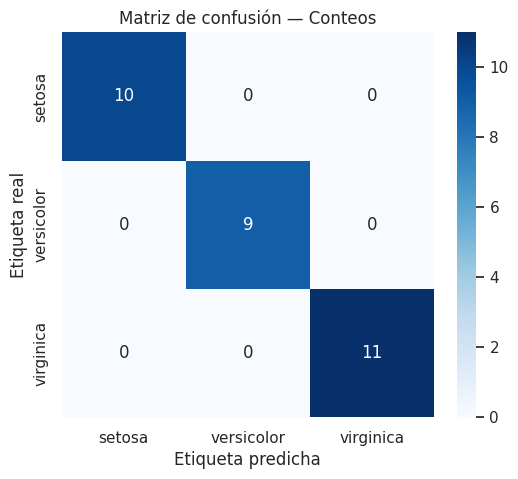

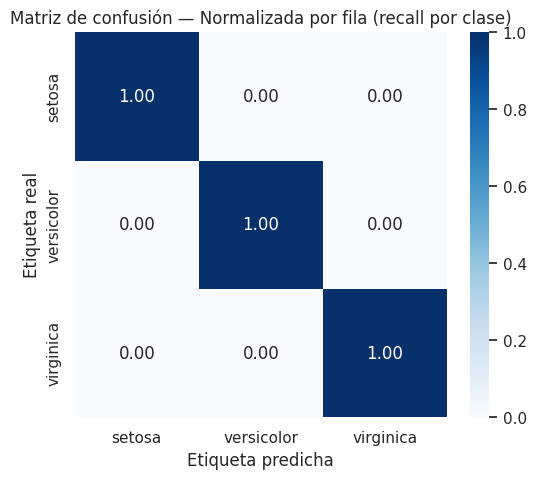

In [14]:
# Asumimos que ya tenemos: y_test, y_pred, iris.target_names
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1) Matriz con sklearn (conteos)
cm = confusion_matrix(y_test, y_pred)  # filas = verdaderas, columnas = predichas
print("Matriz de confusión (conteos):\n", cm)

# 2) Visualizar conteos
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names, cmap='Blues')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')
plt.title('Matriz de confusión — Conteos')
plt.show()

# 3) Matriz normalizada por fila (porcentaje de verdaderos de cada clase)
cm_row_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6,5))
sns.heatmap(np.round(cm_row_norm, 2), annot=True, fmt='.2f', xticklabels=iris.target_names, yticklabels=iris.target_names, cmap='Blues')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')
plt.title('Matriz de confusión — Normalizada por fila (recall por clase)')
plt.show()


In [25]:
# Implementación manual (misma convención: filas=real, cols=pred)
def confusion_matrix_manual(y_true, y_pred, num_classes):
    M = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        M[int(true), int(pred)] += 1
    return M

cm_manual = confusion_matrix_manual(y_test, y_pred, num_classes=len(iris.target_names))
print("Matriz manual:\n", cm_manual)
# Debe coincidir con cm


Matriz manual:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**2. Accuracy (Exactitud)**
El Accuracy mide el porcentaje de aciertos totales del modelo, es decir, cuántas predicciones fueron correctas respecto al total de muestras evaluadas

Su fórmula matemática es:

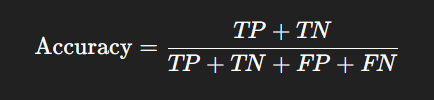
	​


donde:

**TP (True Positives):** Casos positivos correctamente clasificados

**TN (True Negatives):** Casos negativos correctamente clasificados

**FP (False Positives):** Casos negativos clasificados incorrectamente como positivos

**FN (False Negatives):** Casos positivos clasificados incorrectamente como negativos


En palabras simples, el accuracy representa la proporción de predicciones correctas (tanto positivas como negativas) sobre el total de predicciones realizadas

Por ejemplo, si el modelo predice correctamente 90 muestras de un total de 100, su exactitud es:

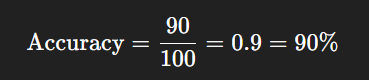

In [15]:
from sklearn.metrics import accuracy_score

# Usando sklearn
acc = accuracy_score(y_test, y_pred)
print("Accuracy (sklearn):", acc)

# Desde la matriz de confusión
acc_from_cm = cm.trace() / cm.sum()
print("Accuracy (desde CM):", acc_from_cm)


Accuracy (sklearn): 1.0
Accuracy (desde CM): 1.0


Accuracy cerca de 1 → alto porcentaje de aciertos global

Si dataset desbalanceado, mirar métricas por clase (precision/recall/f1) en lugar de solo accuracy

**3. Reporte de clasificación**

Para cada clase k, se define (one-vs-rest):

+ **TP_k:** verdaderos positivos para la clase k

+ **FP_k:** falsos positivos para la clase k

+ **FN_k:** falsos negativos para la clase k

**Precision_k = TP_k / (TP_k + FP_k):**
Interpreta de las predicciones que el modelo declaró como k, cuántas son realmente k. Si precision baja → muchas predicciones erróneas como k

**Recall_k (sensibilidad) = TP_k / (TP_k + FN_k):**
Interpreta de los reales k, cuántos el modelo detectó. Si recall bajo → el modelo pierde muchos verdaderos k

**F1_k = 2 * (Precision_k * Recall_k) / (Precision_k + Recall_k):**
Media armónica que balancea precision y recall; útil cuando hay trade-off entre ambas

**Support_k**: número de muestras reales de la clase k (suma de fila k en la matriz)

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Implementación manual de precision/recall/f1 por clase a partir de la matriz:**

In [22]:
def precision_recall_f1_from_cm(cm):
    num_classes = cm.shape[0]
    prf = {}
    for k in range(num_classes):
        TP = cm[k,k]
        FP = cm[:,k].sum() - TP
        FN = cm[k,:].sum() - TP
        # Precision
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
        # Recall
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        # F1
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
        support = int(cm[k,:].sum())
        prf[k] = {'precision': precision, 'recall': recall, 'f1-score': f1, 'support': support}
    return prf

prf = precision_recall_f1_from_cm(cm)
for k, v in prf.items():
    print(f"Clase {iris.target_names[k]} -> precision: {v['precision']:.4f}, recall: {v['recall']:.4f}, f1: {v['f1-score']:.4f}, support: {v['support']}")


Clase setosa -> precision: 1.0000, recall: 1.0000, f1: 1.0000, support: 10
Clase versicolor -> precision: 1.0000, recall: 1.0000, f1: 1.0000, support: 9
Clase virginica -> precision: 1.0000, recall: 1.0000, f1: 1.0000, support: 11


## **Referencias Bibliograficas**

The Iris Dataset. (n.d.). Scikit-learn. https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html

GeeksforGeeks. (2025, July 23). Iris Dataset. GeeksforGeeks. https://www.geeksforgeeks.org/data-science/iris-dataset/

KNeighborsClassifier. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

GeeksforGeeks. (2025, August 23). KNeArest Neighbor(KNN) algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/
